<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных." data-toc-modified-id="Загрузка-и-обзор-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Зависимость-стоимости-квартиры-от-различных-факторов" data-toc-modified-id="Зависимость-стоимости-квартиры-от-различных-факторов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Зависимость стоимости квартиры от различных факторов</a></span></li><li><span><a href="#10-населённых-пунктов" data-toc-modified-id="10-населённых-пунктов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>10 населённых пунктов</a></span></li><li><span><a href="#Квартиры-в-Санкт-Петербурге" data-toc-modified-id="Квартиры-в-Санкт-Петербурге-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры в Санкт-Петербурге</a></span></li><li><span><a href="#Квартиры-в-центре" data-toc-modified-id="Квартиры-в-центре-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Квартиры в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и обзор данных.

Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Функция для обзора и отображания информации о данных

In [2]:
def table_info (df):
    display(df.sample(10)) #10 случайных строк
    print('---------------')
    df.info() #инфо по столбцам
    print('---------------')
    print('Дубликатов:', df.duplicated().sum()) #кол-во дубликатов
    print('---------------')
    print('Пропущенных значений', df.isna().sum()) #кол-во пропущенных значений

Функция для разделения квартир на категории в соответсвии с этажем расположения. 

In [3]:
def floor_grouper(data):
    if data['floor'] == 1:
        return 'первый'
    elif (data['floors_total'] == data['floor']):
        return 'последний'
    else:
        return 'другой'

Функция для отображения распределения в столбцах.

In [4]:
def distribution (df):
    print(df.describe())
    print(df.hist(bins=100))

Рассмотрим данные.
Пропуски в стобцах:ceiling_height(высота потолков), floors_total(всего этажей в доме), is_apartment(апартаменты),kitchen_area(площадь кухни), balcony(балкон), locality_name(населенный пункт), airports_nearest(ближ.аэропорт), cityCenters_nearest(растояние до центра), parks_around3000(число парков в радиусе 3км), ponds_around3000(число водоем в радиусе 3км), ponds_nearest(до ближ.водоема),days_exposition(сколько дней об-ние было актуально)

In [5]:
data = pd.read_csv('flats_SPB.csv', sep='\t') 
table_info(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12760,0,3350000.0,51.00,2015-01-22T00:00:00,2,2.50,12.0,30.0,10,NaN,...,NaN,2.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521.0
15929,6,2940000.0,33.09,2016-08-24T00:00:00,1,NaN,25.0,NaN,18,NaN,...,8.0,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,311.0
10559,8,5865000.0,42.00,2016-06-09T00:00:00,1,NaN,11.0,12.0,9,NaN,...,17.0,2.0,Санкт-Петербург,24151.0,5777.0,1.0,1272.0,2.0,407.0,593.0
1441,19,8500000.0,76.70,2018-07-11T00:00:00,3,2.60,14.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,45076.0,17799.0,0.0,NaN,0.0,NaN,18.0
7799,6,14000000.0,170.00,2018-10-24T00:00:00,5,2.95,3.0,120.0,3,False,...,30.0,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,85.0
6633,17,5210000.0,59.00,2017-02-08T00:00:00,3,2.60,5.0,40.0,5,NaN,...,5.0,1.0,Санкт-Петербург,40065.0,9324.0,1.0,440.0,0.0,NaN,215.0
19127,9,4000000.0,57.00,2017-11-09T00:00:00,2,3.20,4.0,27.0,1,NaN,...,20.0,1.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,137.0
17532,9,4590000.0,73.20,2018-10-08T00:00:00,4,NaN,9.0,48.2,4,NaN,...,6.2,1.0,Колпино,25374.0,31160.0,1.0,180.0,0.0,NaN,74.0
11395,20,6295000.0,57.20,2019-01-17T00:00:00,2,2.60,10.0,40.5,10,NaN,...,15.5,4.0,Санкт-Петербург,29727.0,13949.0,0.0,NaN,0.0,NaN,97.0
22117,7,7907820.0,68.00,2017-04-20T00:00:00,2,NaN,11.0,32.0,3,NaN,...,16.0,0.0,Санкт-Петербург,23363.0,5853.0,0.0,NaN,2.0,557.0,188.0


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  air

### Вывод
- нужно перевести значения в "last_price", "floors_total" из float64 в int64;
- пропуски в столбцах: "ponds_nearest", "ponds_around3000", "parks_nearest", "parks_around3000", "balcony" заменю на 0;
- дату в "first_day_exposition" переведу в формат datetime и выделю два столбца: с месяцем и днем размещения по одтельности и днем недели;
- этажи выделю в категории "первый", "последний" и "другой".

## Предобработка данных

Переведем "last_price" из float64 в int64.

In [6]:
data['last_price'] = data['last_price'].astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Сделаем значения в столбце "floors_total" целыми числами. А пропуски заменим на 0.

In [7]:
try:
    data['floors_total'] = data['floors_total'].astype('int')
except:
    data['floors_total'] = data['floors_total'].fillna(0)
finally:
    data['floors_total'] = data['floors_total'].astype('int')
  
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим сколько 0 в стобце получилось.

In [8]:
zero_count = 0
for i in data['floors_total']:
    if i == 0:
        zero_count += 1

print(zero_count)

86


Заменим пропуски в столбцах: "ponds_nearest", "ponds_around3000", "parks_nearest", "parks_around3000", "balcony"  на 0. Скорее всего пропуски означают, что рядом с этими объектами нет парков, водоемов и балконов.

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переведем дату в нужный формат и уберем время выставления объявления.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменим пропуски в "ceiling_height" медианой.

In [11]:
m = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(m)
data['ceiling_height'].isna().mean()

0.0

In [12]:
flat_kind = data[['is_apartment','studio','open_plan']]
display(flat_kind.head())

,is_apartment,studio,open_plan
0,NaN,False,False
1,NaN,False,False
2,NaN,False,False
3,NaN,False,False
4,NaN,False,False


Заменим пропуски в "is_apartment" на "False", т.к. столбцы с другими видами планировки имею False в аналогичных строках с пропусками в этом столбце 

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['is_apartment'].isna().mean()

0.0

После всех замен проверим неявные дубликаты.

In [14]:
print(data.duplicated().sum())

0


## Расчёты и добавление результатов в таблицу

Для изучения зависимости стоимости квартир от дня выставления на продажу дабавим столбец `week_day` с днями недели соответствующими дате создания объявления.

In [15]:
data['week_day'] = data['first_day_exposition'].dt.day_name() 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Tuesday
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Friday
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday


Добавим категории к квартирам по расположению на этажах.

In [16]:
data['floor_group'] = data.apply(floor_grouper, axis = 1)

Добвляем столбец цены квадратного метра для каждой квартиры в формате целого числа.

In [17]:
data['metre_price'] = (data['last_price'] / data['total_area']).astype('int') 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday,другой,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Tuesday,первый,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday,другой,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Friday,другой,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday,другой,100000


Добавляем соотношение площади кухни к общей площади квартиры.

In [18]:
data['kitchen_ratio'] = ((data['kitchen_area'] / data['total_area']) * 100).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday,другой,120370,23.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,Tuesday,первый,82920,27.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday,другой,92785,15.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,Friday,другой,408176,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday,другой,100000,41.0


Добавляем соотношение жилой площади  к общей площади квартиры

In [19]:
data['living_area_ratio'] = ((data['living_area'] / data['total_area']) * 100).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio,living_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,Thursday,другой,120370,23.0,47.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,0.0,0.0,81.0,Tuesday,первый,82920,27.0,46.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,Thursday,другой,92785,15.0,61.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,Friday,другой,408176,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,Tuesday,другой,100000,41.0,32.0


## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Рассмотрим распределение площадей недвижимости. Самая большая площадь жилья 900 кв. метров, самая маленькая 12 кв. м. Основная масса квартир имеют площадь от 30 до 100 кв. метров.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


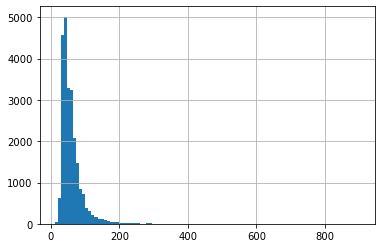

In [20]:
distribution(data['total_area'])

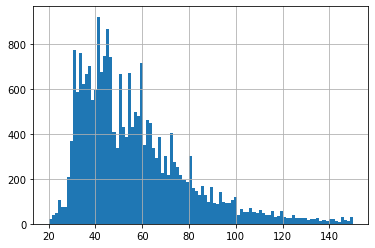

In [21]:
data['total_area'].hist(bins=100, range=(20,150));

Рассмотрим количесво комнат. Минимальное количество комнат 0 - студии, максимальное 19. Большинство квартир имею 1 - 3 комнат.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


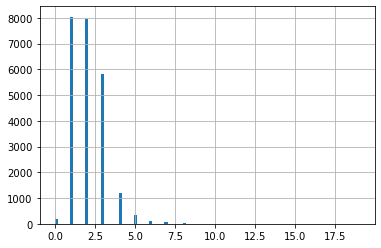

In [22]:
distribution(data['rooms'])

Изучим высоту потолков. Минимальное значение 1 метр, максимальное 100. Основная масса жилья имеет высоту от 2,5 до 3 м.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


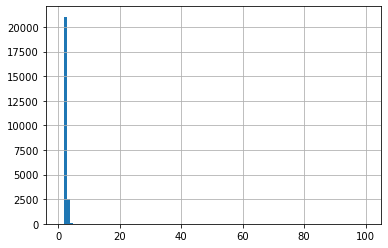

In [23]:
distribution(data['ceiling_height'])

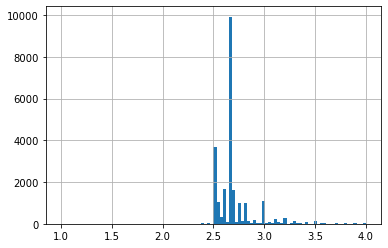

In [24]:
data['ceiling_height'].hist(bins=100, range=(1,4));

Общая стоимость жилья. Для более удобного построения графика уберем несколько нулей поделив цену на 1000. Получаем минимальную цену жилья 12000, а максимальную 763 млн. руб. Цены на недвижимость в основном находятся в диапозоне 3,4 млн. - 8 млн. руб.

          last_price
count   23699.000000
mean     6541.548772
std     10887.013268
min        12.190000
25%      3400.000000
50%      4650.000000
75%      6800.000000
max    763000.000000
[[<AxesSubplot:title={'center':'last_price'}>]]


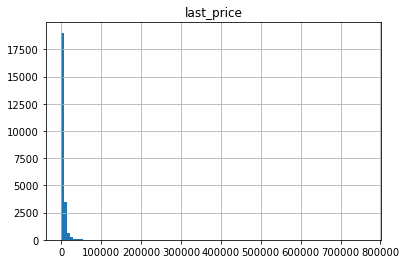

In [25]:
distribution(data[['last_price']] / 1000)

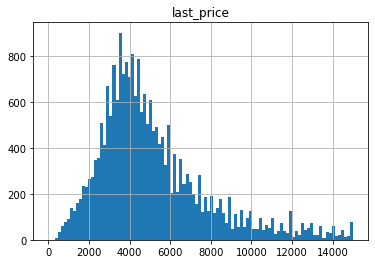

In [26]:
(data[['last_price']] / 1000).hist(bins=100, range=(12,15000));

Вывод.

Большинство квартир находит в диапозонах:
- по площади: от 30 до 100 кв. метров;
- по количеству комнат: от 1 до 3;
- по высоте потолков: 2,5 до 3 метров;
- по ценам: 3,4 млн. - 8 миллионов рублей.

### Время продажи квартиры

Изучим время которое нужно для продажи недвижимости. Самый быстрый период продажи - 1 день, самый продолжительный 1580 дней (4 с лишним года). В основном недвижимость продается за первые 200 дней. При ближайшем рассмотрении видны некоторое количество пиков продаж (7, 10, 45, 60, 90) - возможно сказывается повторное выставление объявлений и поднятие в списке объектов на продажу.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


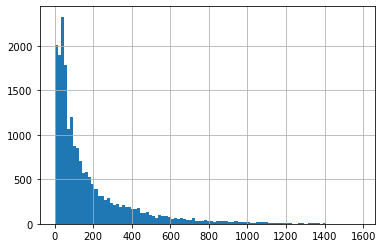

In [27]:
distribution(data['days_exposition'])

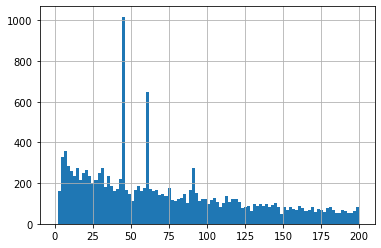

In [28]:
data['days_exposition'].hist(bins=100,range=(0,200));

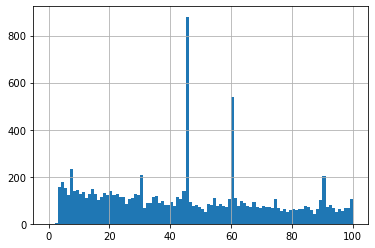

In [29]:
data['days_exposition'].hist(bins=100,range=(0,100));

При рассмотрении зависимости продаж в первые 50 дней и цен, можно заметить, что нет взаимосвязи, т.е. низкая цена не осбо влияет на скорость покупки.

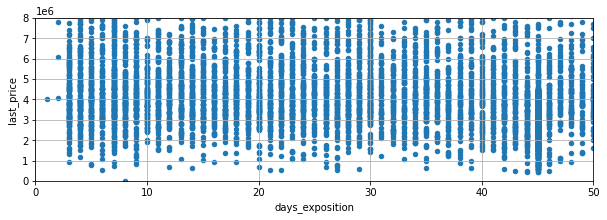

In [30]:
data.plot(x='days_exposition', y='last_price', ylim =(0,8000000), xlim = (0,50), kind='scatter', grid=True, figsize=(10, 3));

Вывод: Продажа на протяжении первых 200 дней нормальное явление, дольше 900 дней - редкое. Продажи за первые 50 дней существования объявления кажутся быстрым, но все же они присутствуют во всех ценовых категориях.   

### Зависимость стоимости квартиры от различных факторов 

Выделим в отдельную таблицу квартиры отфильтрованные по параметрам: 
* пплощадь от 30 до 100 квадратных метров;
* количество комнат от 0 до 5;
* высота потолков 2,5 до 3,5 метров;

In [31]:
data_two = data.query('30 <= total_area <= 100 & rooms <= 5 & (2.5 <= ceiling_height <= 3.5)')
print(data_two.columns)
print(len(data_two))

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'week_day', 'floor_group',
       'metre_price', 'kitchen_ratio', 'living_area_ratio'],
      dtype='object')
20928


Добавляем в таблицу два столбца с годом и месяцем выставления на продажу.

In [32]:
data_two['month'] = data['first_day_exposition'].dt.month #месяц создания объявления
data_two['year'] = data['first_day_exposition'].dt.year #год выставления на продажу
display(data_two.head())

import warnings
warnings.simplefilter("ignore")

/tmp/ipykernel_13048/2857782666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_two['month'] = data['first_day_exposition'].dt.month #месяц создания объявления
/tmp/ipykernel_13048/2857782666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_two['year'] = data['first_day_exposition'].dt.year #год выставления на продажу


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio,living_area_ratio,month,year
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,81.0,Tuesday,первый,82920,27.0,46.0,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,Thursday,другой,92785,15.0,61.0,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,Tuesday,другой,100000,41.0,32.0,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0.0,55.0,Monday,другой,95065,30.0,47.0,9,2018
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0.0,0.0,155.0,Thursday,другой,99195,39.0,28.0,11,2017


Рассмтрим зависимость цены и размера квартиры при помощи графика рассеивания и коэффициента корреляции. Можем судить о том, что есть зависимость средней величины. 

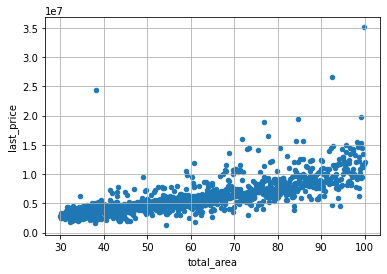

In [33]:
(
    data_two.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .reset_index()
    .sort_values(by='last_price')
    .plot(x='total_area', y='last_price', kind='scatter', grid=True)
);

In [34]:
print(data_two['total_area'].corr(data_two['last_price']))

0.6484237484754041


Изучим зависимость цены и этажа квартиры. Стоимость квартир на первом этаже ниже остальных, а жил.площадь расположенная на других этажах (не 1 и не на последнем) дороже всех. Коэффициент корреляции указывет на слабую положительную зависимость между признаками объектов.

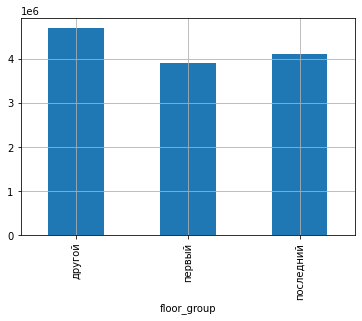

In [35]:
data_two.groupby('floor_group')['last_price'].median().plot(kind='bar', grid=True);

In [36]:
print(data_two['floor'].corr(data_two['last_price']))

0.11332916963097814


Проанализируем зависимость цен и растояния до центра города. Присутвует небольшая обратная зависимость между признаками: чем объект ближе к центру, тем выше стоимость.

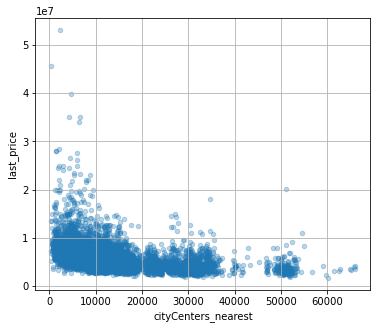

In [37]:
(
    data_two.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='cityCenters_nearest', y='last_price', kind='scatter',figsize=(6, 5), alpha=0.3, grid=True)
);

In [38]:
print(data_two['last_price'].corr(data_two['cityCenters_nearest']))

-0.33589493572011436


Значительной зависимости цены от дня недели в который выставили предложение о продажи нет, уровень цен примерно одинаков во все дни недели.

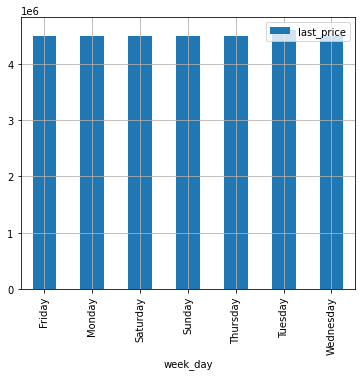

In [39]:
(
    data_two.pivot_table(index='week_day', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='week_day', y='last_price', kind='bar',figsize=(6, 5), grid=True)
);

Заметны небольшие колебания цен в разные месяцы начала продаж - в апреле цены выше, в июне самые низкие. Коеффициент корреляции очень низкий. Зависимости практически нет.

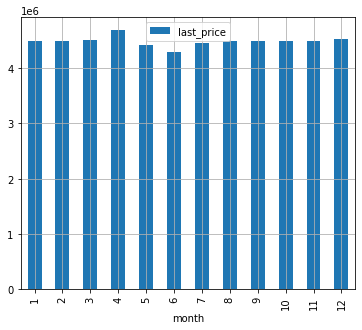

In [40]:
(
    data_two.pivot_table(index='month', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='month', y='last_price', kind='bar',figsize=(6, 5), grid=True)
);

In [41]:
print(data_two['last_price'].corr(data_two['month']))

-0.002071514990930028


Цены на квартиры в 2014 очевидно выше, чем в другие года. До 2016 года наблюдается спад, после 2017 рост цен. Коеффициент корреляции очень низкий. 

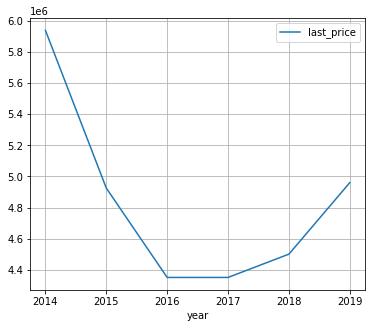

In [42]:
(
    data_two.pivot_table(index='year', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='year', y='last_price', kind='line',figsize=(6, 5), grid=True)
);

In [43]:
print(data_two['last_price'].corr(data_two['year']))

0.008193469997475077


Самая низкая цена на студии и однокомнатные квартиры, самая высокая на квартиры с 4 комнатами. Коэффициент корреляции показывает слабую зависимость этих двух параметров.

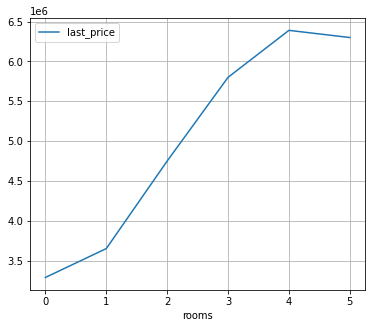

In [44]:
(
    data_two.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='rooms', y='last_price', kind='line',figsize=(6, 5), grid=True)
);

In [45]:
print(data_two['rooms'].corr(data_two['last_price']))

0.3428355941853621


In [46]:
data_two[['last_price', 'rooms', 'year', 'month', 'week_day', 
                  'cityCenters_nearest', 'floor', 'total_area']].corr()

,last_price,rooms,year,month,cityCenters_nearest,floor,total_area
last_price,1.000000,0.342836,0.008193,-0.002072,-0.335895,0.113329,0.648424
rooms,0.342836,1.000000,-0.022041,-0.002410,-0.080000,-0.168883,0.778328
year,0.008193,-0.022041,1.000000,-0.271690,0.015982,0.004644,-0.046082
month,-0.002072,-0.002410,-0.271690,1.000000,-0.011542,0.017827,0.002818
cityCenters_nearest,-0.335895,-0.080000,0.015982,-0.011542,1.000000,-0.011570,-0.155787
floor,0.113329,-0.168883,0.004644,0.017827,-0.011570,1.000000,-0.010588
total_area,0.648424,0.778328,-0.046082,0.002818,-0.155787,-0.010588,1.000000


Выводы:

Самое сильное влияние на цену жилого помещения оказывает - площадь квартиры. Меньше меняет цену - близость к центру города, количество комнат, этаж расположения. Период выставления объявления о продаже практически никак не влияет на стоимость квартиры.

### 10 населённых пунктов

Выделим 10 населенных пунктов с самым большим количеством объявлений.

In [47]:
data_settlements = (
    data_two.pivot_table(index='locality_name', values='last_price', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending= False)
    .reset_index()
    .iloc[0:10]
)
data_settlements['mean'] = data_settlements['mean'].round().astype('int')
display(data_settlements)

,locality_name,count,mean
0,Санкт-Петербург,13496.0,6078903
1,посёлок Мурино,454.0,3863844
2,посёлок Шушары,414.0,4070891
3,Всеволожск,380.0,3783116
4,Пушкин,327.0,5435144
5,Колпино,325.0,3831733
6,посёлок Парголово,317.0,4502383
7,Гатчина,297.0,3430001
8,деревня Кудрово,266.0,4387188
9,Выборг,206.0,3043908


Самая дорогая недвижимость в населенных пунктах Санкт-Петербург и Пушкин, а самая дешевая в Гатчине и Выборге.

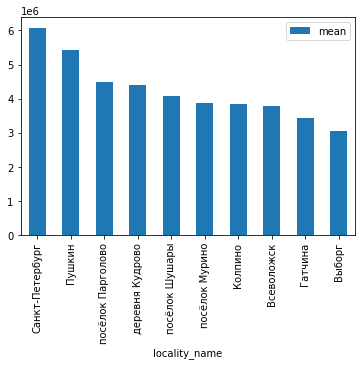

In [48]:
(
    data_settlements.sort_values(by='mean', ascending= False)
    .plot(x='locality_name', y='mean', kind='bar')
);

Вывод:
Самая дорогая недвижимость в населенных пунктах Санкт-Петербург и Пушкин, самая дешевая в Гатчине и Выборге  

### Квартиры в Санкт-Петербурге

Изучим предложения о продаже недвижимости в Санкт-Петербурге и найдем значение для критерия "центр города", который понадобится для продолжения исследования.

In [49]:
spb_flats = data_two.query('"Санкт-Петербург" in locality_name')
display(spb_flats.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio,living_area_ratio,month,year
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,Thursday,другой,92785,15.0,61.0,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,Tuesday,другой,100000,41.0,32.0,6,2018
7,5,7915000,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,0.0,0.0,NaN,Thursday,другой,110544,26.0,NaN,4,2019
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,0.0,289.0,Sunday,другой,88524,11.0,71.0,2,2017
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2.0,553.0,137.0,Thursday,другой,127525,21.0,51.0,11,2017


Пропущенные значения удаляем. 

In [50]:
print(len(spb_flats[spb_flats['cityCenters_nearest'].isna()]))
spb_flats.dropna(axis=0,inplace=False)

44


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio,living_area_ratio,month,year
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,Thursday,другой,92785,15.0,61.0,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,Tuesday,другой,100000,41.0,32.0,6,2018
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,0.0,289.0,Sunday,другой,88524,11.0,71.0,2,2017
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2.0,553.0,137.0,Thursday,другой,127525,21.0,51.0,11,2017
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1.0,296.0,19.0,Saturday,другой,119230,19.0,53.0,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,1.0,317.0,193.0,Saturday,другой,106451,21.0,58.0,4,2017
23687,6,3200000,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,0.0,0.0,38.0,Saturday,другой,82051,28.0,51.0,12,2017
23689,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,2.0,652.0,29.0,Wednesday,другой,100566,26.0,46.0,2,2018
23690,3,5500000,52.0,2018-07-19,2,2.65,5,31.0,2,False,...,0.0,0.0,15.0,Thursday,другой,105769,12.0,60.0,7,2018


Переведем растояние до центра в километры.

In [51]:
spb_flats['cityCenters_nearest'] = (spb_flats['cityCenters_nearest'] / 1000).round()
display(spb_flats.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,week_day,floor_group,metre_price,kitchen_ratio,living_area_ratio,month,year
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,Thursday,другой,92785,15.0,61.0,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,Tuesday,другой,100000,41.0,32.0,6,2018
7,5,7915000,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,0.0,0.0,NaN,Thursday,другой,110544,26.0,NaN,4,2019
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,0.0,289.0,Sunday,другой,88524,11.0,71.0,2,2017
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2.0,553.0,137.0,Thursday,другой,127525,21.0,51.0,11,2017


Сгруппируем по удаленности от центра и расчитаем стреднюю цену. Из этих данных построи график зависимости цены и удаленности от центра. После 8 киломентров цена практически стабильно падает. Радиус в 8 километров можно считать центром города.

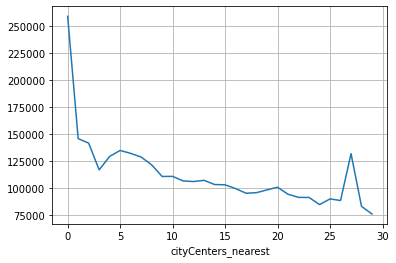

In [52]:
(
    spb_flats.groupby('cityCenters_nearest')['metre_price'].mean()
    .plot(x='cityCenters_nearest', y='last_price', kind='line', grid=True)
);


Вывод:
В центр города входит зона с радиусом в 8 киллометра. 

### Квартиры в центре

Выделяем квартиры в центре города.

In [53]:
center_spb_flats = spb_flats.query('cityCenters_nearest <= 7')

Самые дорогие квартиры с 5 комнатами. 3х и 4х комнатрные стоят примерно одинакова. Студии и однокомнатные квартиры близки по стоимости.

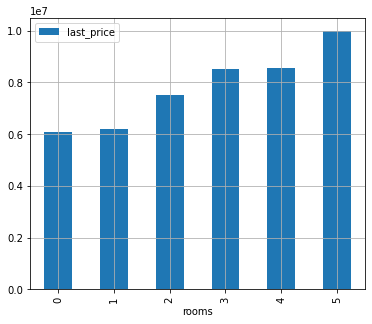

In [54]:
(
    center_spb_flats.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='rooms', y='last_price', kind='bar',figsize=(6, 5), grid=True)
);

У студий и однокомнатных квартир самая высокая стоимость за квадратный метр.

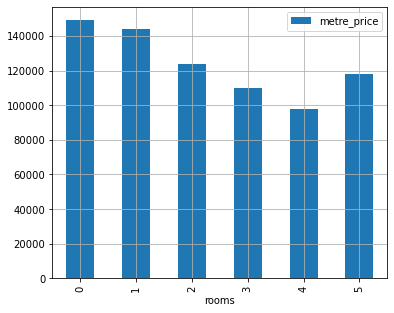

In [55]:
(
    center_spb_flats.pivot_table(index='rooms', values='metre_price', aggfunc='median')
    .reset_index()
    .plot(x='rooms', y='metre_price', kind='bar',figsize=(6, 5), grid=True)
);

Коэффициент корреляции указывает на слабую зависимость стоимости за квартиру от числа комнат в квартире.

In [56]:
print(center_spb_flats['rooms'].corr(center_spb_flats['last_price']))

0.19440681107976485


Стоимость квартир на первом этаже ниже остальных.

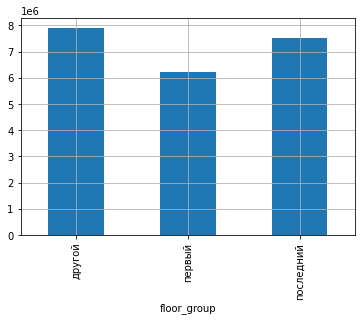

In [57]:
center_spb_flats.groupby('floor_group')['last_price'].median().plot(kind='bar', grid=True); 

Низкая зависимость цены и этажа квартиры.

In [58]:
print(center_spb_flats['floor'].corr(center_spb_flats['last_price']))

0.1063052364958524


По графику и значению коэффициента корреляции можем сделать вывод, чо чем ближе к центру города, тем выше стоимость квартиры. 

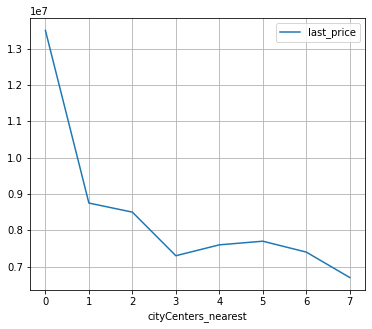

In [59]:
(
    center_spb_flats.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='cityCenters_nearest', y='last_price', kind='line',figsize=(6, 5), grid=True)
);

In [60]:
print(center_spb_flats['last_price'].corr(center_spb_flats['cityCenters_nearest']))

-0.11429065470412368


Цены во все месяцы примерно одинаковые. Можно выделить месяцы в которые значения цен были ниже: май, июль, декабрь. Зависимость цены и месяца продажи очень слабая.

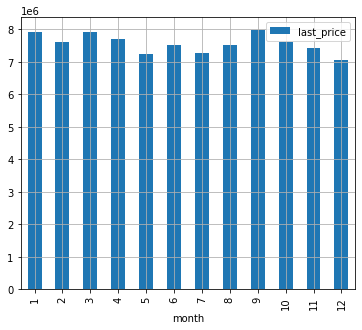

In [61]:
(
    center_spb_flats.pivot_table(index='month', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='month', y='last_price', kind='bar',figsize=(6, 5), grid=True)
);

In [62]:
print(center_spb_flats['last_price'].corr(center_spb_flats['month']))

-0.022949529325229933


В 2015 году цены сильно упали, но после 2017 года наблюдается рост. Коэффициент корреляции указывает на слабую зависимость двух показателей.

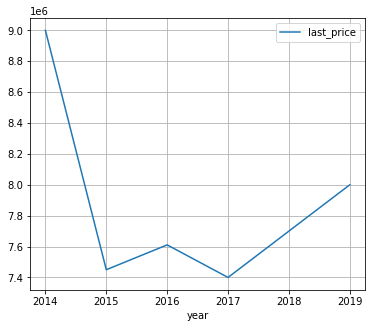

In [63]:
(
    center_spb_flats.pivot_table(index='year', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='year', y='last_price', kind='line',figsize=(6, 5), grid=True)
);

In [64]:
print(center_spb_flats['last_price'].corr(center_spb_flats['year']))

0.03281240813930292


На графике и на значении коэффициента корреляции мы можем наблюдать зависимость средней величины между стоимостью недвижимости и площадью. Чем больше площадь квартиры, тем выше её стоимость.

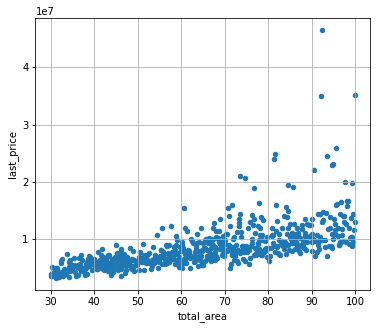

In [65]:
(
    center_spb_flats.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .reset_index()
    .plot(x='total_area', y='last_price', kind='scatter',figsize=(6, 5), grid=True)
);

In [66]:
print(center_spb_flats['last_price'].corr(center_spb_flats['total_area']))

0.5234644321669993


In [67]:
center_spb_flats[['last_price', 'rooms', 'year', 'month', 'week_day', 
                  'cityCenters_nearest', 'floor', 'total_area']].corr()

,last_price,rooms,year,month,cityCenters_nearest,floor,total_area
last_price,1.000000,0.194407,0.032812,-0.022950,-0.114291,0.106305,0.523464
rooms,0.194407,1.000000,-0.020796,0.018549,-0.172270,-0.127814,0.726449
year,0.032812,-0.020796,1.000000,-0.254139,0.048778,-0.012433,-0.045216
month,-0.022950,0.018549,-0.254139,1.000000,-0.014067,0.000426,-0.004719
cityCenters_nearest,-0.114291,-0.172270,0.048778,-0.014067,1.000000,0.234403,-0.154590
floor,0.106305,-0.127814,-0.012433,0.000426,0.234403,1.000000,-0.012116
total_area,0.523464,0.726449,-0.045216,-0.004719,-0.154590,-0.012116,1.000000


Вывод:
Квартины в центре города дороже всех остальных. В центре нет студий. Больше всего на стоимость помещения влияет площадь квартиры, меньшее влиянее оказывают такие факторы как: количество комнат,близость к центру города, этаж. Время выставления помещения на продаже влияния практически не оказывает.

## Общий вывод
Самыми значительными факторами для формирования цены для квартир оказались:
* общая площадь квартиры;
* близость к центру города;
* количество комнат;
* этаж.
День недели, месяц, год создания объявления на стоимость не влияют. 
 
В среднем на продажу квартиры уходило около 200 дней. В редких случиях больше 900 дней.
Квартины в центре города дороже всех остальных. В центре нет студий. Самая высокая стоимость квадратного метра у студий и однокомнатных квартир.